In [1]:
!pip install d2l==1.0.3


In [2]:
import torch
from torch import nn, optim
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [3]:
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr, weight_decay):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), nn.LazyLinear(num_hiddens_1), nn.ReLU(),
            nn.Dropout(dropout_1), nn.LazyLinear(num_hiddens_2), nn.ReLU(),
            nn.Dropout(dropout_2), nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

In [4]:
# Create model with weight decay
hparams = {'num_outputs': 10, 'num_hiddens_1': 256, 'num_hiddens_2': 256,
           'dropout_1': 0.5, 'dropout_2': 0.5, 'lr': 0.1, 'weight_decay': 0.001}

model = DropoutMLP(**hparams)
data = d2l.FashionMNIST(batch_size=256)

# Define optimizer with weight decay (using weight_decay parameter)
optimizer = optim.SGD(model.parameters(), lr=hparams['lr'], weight_decay=hparams['weight_decay'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [5]:
# Lists to store training and validation metrics
train_loss_history, val_loss_history, val_acc_history = [], [], []

In [6]:
# Train the model using PyTorch's training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch in data.train_dataloader():
        optimizer.zero_grad()
        X, y = batch
        y_hat = model(X)
        loss = model.loss(y_hat, y)
        loss.backward()
        optimizer.step()
        train_loss_history.append(loss.item())

    model.eval()
    correct, total = 0, 0
    for batch in data.val_dataloader():
        X_val, y_val = batch
        y_val_hat = model(X_val)
        _, predicted = torch.max(y_val_hat, 1)
        total += y_val.size(0)
        correct += (predicted == y_val).sum().item()

    val_acc = correct / total
    val_loss_history.append(loss.item())
    val_acc_history.append(val_acc)

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {train_loss_history[-1]:.4f}, '
          f'Validation Loss: {val_loss_history[-1]:.4f}, '
          f'Validation Accuracy: {val_acc:.4f}')


Epoch 1/10, Training Loss: 0.6963, Validation Loss: 0.6963, Validation Accuracy: 0.6906
Epoch 2/10, Training Loss: 0.7691, Validation Loss: 0.7691, Validation Accuracy: 0.7634
Epoch 3/10, Training Loss: 0.4831, Validation Loss: 0.4831, Validation Accuracy: 0.8165
Epoch 4/10, Training Loss: 0.5167, Validation Loss: 0.5167, Validation Accuracy: 0.8159
Epoch 5/10, Training Loss: 0.4410, Validation Loss: 0.4410, Validation Accuracy: 0.8338
Epoch 6/10, Training Loss: 0.4422, Validation Loss: 0.4422, Validation Accuracy: 0.8373
Epoch 7/10, Training Loss: 0.4838, Validation Loss: 0.4838, Validation Accuracy: 0.8412
Epoch 8/10, Training Loss: 0.5621, Validation Loss: 0.5621, Validation Accuracy: 0.8486
Epoch 9/10, Training Loss: 0.3736, Validation Loss: 0.3736, Validation Accuracy: 0.8333
Epoch 10/10, Training Loss: 0.4426, Validation Loss: 0.4426, Validation Accuracy: 0.8475


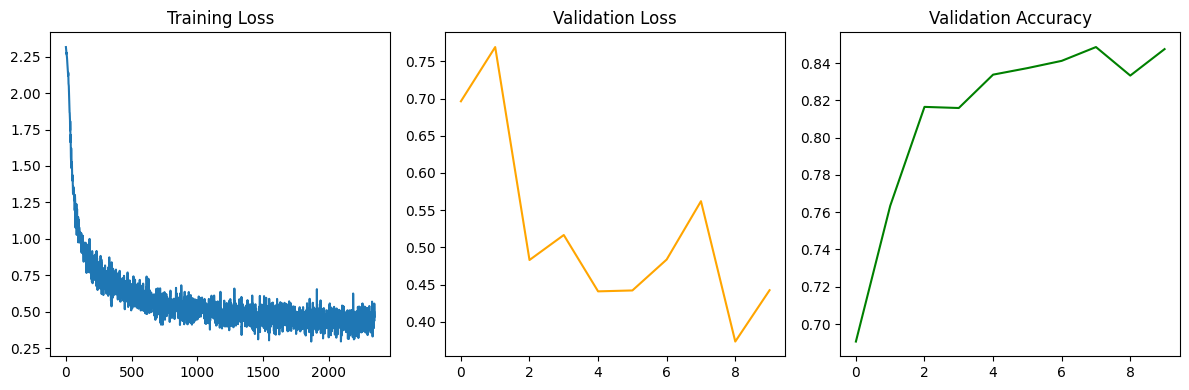

In [7]:
# Plotting the training loss, validation loss, and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.title('Training Loss')

plt.subplot(1, 3, 2)
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.title('Validation Loss')

plt.subplot(1, 3, 3)
plt.plot(val_acc_history, label='Validation Accuracy', color='green')
plt.title('Validation Accuracy')

plt.tight_layout()
plt.show()

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), nn.LazyLinear(num_hiddens_1), nn.ReLU(),
            nn.Dropout(dropout_1), nn.LazyLinear(num_hiddens_2), nn.ReLU(),
            nn.Dropout(dropout_2), nn.LazyLinear(num_outputs))

In [12]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLP(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)

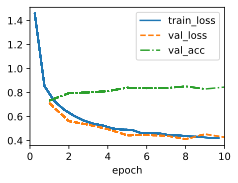

In [13]:
model = DropoutMLP(**hparams)
trainer.fit(model, data)

In [ ]:
# Upon inspection using both weight decay and dropout does not appear to take anything away from the model, such as accuracy or training time
# Additionally, fro the analysis, weight decay appears to perform slightly better than dropout on its own 